### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
# %load_ext autoreload

# %autoreload
# %reload_ext autoreload 

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

# Compile the main simulator code using cython 

In [3]:
!python setup.py build_ext --inplace

running build_ext
running build_ext


# Import all the relevant files 

In [4]:
# Import the pipeline creation object
import pandas as pd
import numpy as np
import cbgt as cbgt
import pipeline_creation as pl_creat
import plotting_functions as plt_func
import plotting_helper_functions as plt_help


import importlib

importlib.reload(plt_help)
importlib.reload(plt_func)

2023-02-22 16:32:29,354	INFO worker.py:842 -- Connecting to existing Ray cluster at address: 172.26.108.193:6379


<module 'plotting_functions' from '/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_functions.py'>

# Choose the experiment and create the main pipeline

In [5]:
# Choose the experiment
experiment_choice = "plastic"

# Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experiment_choice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

# set a seed
seed = np.random.randint(0,99999999,1)[0]
print(seed)


75434668


In [6]:
#Import core functions

# from frontendhelpers import * 
# from tracetype import *
# import qvalues as qval
# import generateepochs as gen
# from agentmatrixinit import *

# import pipeline_creation as pl_creat

# Import plotting functions
# import matplotlib.pyplot as plt

# Define the data and figure directory

data_dir = "./Data/"
figure_dir = "./Figures/"


# Running the pipeline

### 1. Default values of environment variable

In [7]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'experimentchoice': experiment_choice,
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    #'dpmns' : pd.DataFrame([0.05], columns=['dpmn_wmax']),
    #'d1' : None, #D1-MSNs population related parameters (init_params.py)
    'd1': None,#pd.DataFrame([[39.5,0.055]], columns=['dpmn_alphaw','dpmn_wmax']),
    'd2': None, #pd.DataFrame([[-38.2,0.035]], columns=['dpmn_alphaw','dpmn_wmax']),
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' :None,
    'Q_support_params': None,#pd.DataFrame([[85,0.6]],columns=['dpmn_CPP_scale','q_alpha']), #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 10, #number of trials (generateepochs.py)
    'volatility': 5, #frequency of changepoints (generateepochs.py)
    'conflict': 1.0, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.01, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 1.0, # 3 instead? how much stimulus the LIP gets at maximum
    'opt_signal_present':False,
    'opt_signal_probability':1.0, # probability of trials that will get the stop signal / list of trial numbers
    'opt_signal_amplitude':0.2, # ampitude of the stop signal over base line
    'opt_signal_onset':0., # in ms
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["D1STR"],
    'sustainedfraction':0.85
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
}


### Run the simulation - 1 thread with the environment variable

In [8]:
results = cbgt.ExecutionManager(cores=7).run([pl]*1,[environment]*1)

(worker pid=2584701) reward_values [1.01764052 1.00400157 1.00978738 1.02240893 1.01867558 0.99022722
(worker pid=2584701)  1.00950088 0.99848643 0.99896781 1.00410599]
(worker pid=2584701) cp_idx [ 0  5 10  9]
(worker pid=2584701) cp_idx [0 5 9]
(worker pid=2584701) reward_values [1.01764052 1.00400157 1.00978738 1.02240893 1.01867558 0.99022722
(worker pid=2584701)  1.00950088 0.99848643 0.99896781 1.00410599]
(worker pid=2584701) cp_idx [ 0  5 10  9]
(worker pid=2584701) cp_idx [0 5 9]
(worker pid=2584701) q_support None
(worker pid=2584701) 0    15.0`
(worker pid=2584701) Name: dpmn_CPP_scale, dtype: object
(worker pid=2584701) q_support None
(worker pid=2584701) 0    15.0`
(worker pid=2584701) Name: dpmn_CPP_scale, dtype: object


(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(
(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(


(worker pid=2584701) 2 4 0.161666`
(worker pid=2584701) 2 4 0.161666`
(worker pid=2584701) 3 5 0.161666`
(worker pid=2584701) 10 6 1.0`
(worker pid=2584701) 10 8 1.0`
(worker pid=2584701) 3 5 0.161666`
(worker pid=2584701) 10 6 1.0`
(worker pid=2584701) 10 8 1.0`
(worker pid=2584701) 10 10 0.13`
(worker pid=2584701) 10 12 1.0`
(worker pid=2584701) 10 14 1.0`
(worker pid=2584701) 10 15 0.0725`
(worker pid=2584701) 10 10 0.13`
(worker pid=2584701) 10 12 1.0`
(worker pid=2584701) 10 14 1.0`
(worker pid=2584701) 10 15 0.0725`
(worker pid=2584701) 11 7 1.0`
(worker pid=2584701) 11 9 1.0`
(worker pid=2584701) 11 7 1.0`
(worker pid=2584701) 11 9 1.0`
(worker pid=2584701) 11 11 0.13`
(worker pid=2584701) 11 13 1.0`
(worker pid=2584701) 11 14 1.0`
(worker pid=2584701) 11 11 0.13`
(worker pid=2584701) 11 13 1.0`
(worker pid=2584701) 11 14 1.0`
(worker pid=2584701) 11 15 0.0725`
(worker pid=2584701) 12 6 1.0`
(worker pid=2584701) 12 8 1.0`
(worker pid=2584701) 12 14 0.8334`
(worker pid=2584701) 1

(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)
(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)


(worker pid=2584701) phasetimer 162
(worker pid=2584701) globaltimer 1257
(worker pid=2584701) gateFRs [30.66666667 26.        ]
(worker pid=2584701) thresholds_crossed [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 162
(worker pid=2584701) globaltimer 1257
(worker pid=2584701) gateFRs [30.66666667 26.        ]
(worker pid=2584701) thresholds_crossed [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 301
(worker pid=2584701) globaltimer 1558
(worker pid=2584701) trial_num 1
(worker pid=2584701)   action
(worker pid=2584701) 0   left
(worker pid=2584701) 1  right
(worker pid=2584701) chosen_action left
(worker pid=2584701) Q_support_params.chosen_action[0] left
(worker pid=2584701) trial_num 1
(worker pid=2584701) TRIAL WISE Q DF left     0.732938
(worker pid=2584701) right    0.500000
(worker pid=2584701) Name: 0, dtype: float64
(worker pid=2584701) self.dpmndefaults['dpmn_DAp'].values[0] 4.065950047902265
(worker pid=2584701) phasetimer 30

(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)
(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)


(worker pid=2584701) phasetimer 150
(worker pid=2584701) globaltimer 2309
(worker pid=2584701) gateFRs [30.22222222 23.77777778]
(worker pid=2584701) thresholds_crossed [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 150
(worker pid=2584701) globaltimer 2309
(worker pid=2584701) gateFRs [30.22222222 23.77777778]
(worker pid=2584701) thresholds_crossed [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 301
(worker pid=2584701) globaltimer 2610
(worker pid=2584701) trial_num 2
(worker pid=2584701)   action
(worker pid=2584701) 0   left
(worker pid=2584701) 1  right
(worker pid=2584701) chosen_action left
(worker pid=2584701) Q_support_params.chosen_action[0] left
(worker pid=2584701) trial_num 2
(worker pid=2584701) TRIAL WISE Q DF left     0.854917
(worker pid=2584701) right    0.500000
(worker pid=2584701) Name: 0, dtype: float64
(worker pid=2584701) self.dpmndefaults['dpmn_DAp'].values[0] 2.3230596427070256
(worker pid=2584701) phasetimer 3

(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)
(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)


(worker pid=2584701) phasetimer 131
(worker pid=2584701) globaltimer 3342
(worker pid=2584701) gateFRs [31.11111111 26.        ]
(worker pid=2584701) thresholds_crossed [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 131
(worker pid=2584701) globaltimer 3342
(worker pid=2584701) gateFRs [31.11111111 26.        ]
(worker pid=2584701) thresholds_crossed [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 301
(worker pid=2584701) globaltimer 3643
(worker pid=2584701) trial_num 3
(worker pid=2584701)   action
(worker pid=2584701) 0   left
(worker pid=2584701) 1  right
(worker pid=2584701) chosen_action left
(worker pid=2584701) Q_support_params.chosen_action[0] left
(worker pid=2584701) trial_num 3
(worker pid=2584701) TRIAL WISE Q DF left     0.924609
(worker pid=2584701) right    0.500000
(worker pid=2584701) Name: 0, dtype: float64
(worker pid=2584701) self.dpmndefaults['dpmn_DAp'].values[0] 1.4670060857532214
(worker pid=2584701) phasetimer 3

(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)
(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)


(worker pid=2584701) phasetimer 114
(worker pid=2584701) globaltimer 4358
(worker pid=2584701) gateFRs [30.22222222 22.66666667]
(worker pid=2584701) thresholds_crossed [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 114
(worker pid=2584701) globaltimer 4358
(worker pid=2584701) gateFRs [30.22222222 22.66666667]
(worker pid=2584701) thresholds_crossed [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 301
(worker pid=2584701) globaltimer 4659
(worker pid=2584701) trial_num 4
(worker pid=2584701)   action
(worker pid=2584701) 0   left
(worker pid=2584701) 1  right
(worker pid=2584701) chosen_action left
(worker pid=2584701) Q_support_params.chosen_action[0] left
(worker pid=2584701) trial_num 4
(worker pid=2584701) TRIAL WISE Q DF left     0.968619
(worker pid=2584701) right    0.500000
(worker pid=2584701) Name: 0, dtype: float64
(worker pid=2584701) self.dpmndefaults['dpmn_DAp'].values[0] 0.7508530658065482
(worker pid=2584701) phasetimer 3

(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)
(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)


(worker pid=2584701) phasetimer 154
(worker pid=2584701) globaltimer 5414
(worker pid=2584701) gateFRs [30.44444444 24.88888889]
(worker pid=2584701) thresholds_crossed 
(worker pid=2584701) [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 154
(worker pid=2584701) globaltimer 5414
(worker pid=2584701) gateFRs [30.44444444 24.88888889]
(worker pid=2584701) thresholds_crossed [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 301
(worker pid=2584701) globaltimer 5715
(worker pid=2584701) trial_num 5
(worker pid=2584701)   action
(worker pid=2584701) 0   left
(worker pid=2584701) 1  right
(worker pid=2584701) chosen_action left
(worker pid=2584701) Q_support_params.chosen_action[0] left
(worker pid=2584701) trial_num 5
(worker pid=2584701) TRIAL WISE Q DF left     0.991144
(worker pid=2584701) right    0.500000
(worker pid=2584701) Name: 0, dtype: float64
(worker pid=2584701) self.dpmndefaults['dpmn_DAp'].values[0] -14.867164512328895
(worker pi

(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)
(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)


(worker pid=2584701) phasetimer 231
(worker pid=2584701) globaltimer 6547
(worker pid=2584701) gateFRs [30.44444444 22.        ]
(worker pid=2584701) thresholds_crossed [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 231
(worker pid=2584701) globaltimer 6547
(worker pid=2584701) gateFRs [30.44444444 22.        ]
(worker pid=2584701) thresholds_crossed [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 301
(worker pid=2584701) globaltimer 6848
(worker pid=2584701) trial_num 6
(worker pid=2584701)   action
(worker pid=2584701) 0   left
(worker pid=2584701) 1  right
(worker pid=2584701) chosen_action left
(worker pid=2584701) Q_support_params.chosen_action[0] left
(worker pid=2584701) trial_num 6
(worker pid=2584701) TRIAL WISE Q DF left     0.545129
(worker pid=2584701) right    0.500000
(worker pid=2584701) Name: 0, dtype: float64
(worker pid=2584701) self.dpmndefaults['dpmn_DAp'].values[0] -8.176940481780893
(worker pid=2584701) phasetimer 3

(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)
(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)


(worker pid=2584701) phasetimer 370
(worker pid=2584701) globaltimer 7819
(worker pid=2584701) gateFRs [23.33333333 30.22222222]
(worker pid=2584701) thresholds_crossed [1]
(worker pid=2584701) other_action 0
(worker pid=2584701) phasetimer 370
(worker pid=2584701) globaltimer 7819
(worker pid=2584701) gateFRs [23.33333333 30.22222222]
(worker pid=2584701) thresholds_crossed [1]
(worker pid=2584701) other_action 0
(worker pid=2584701) phasetimer 301
(worker pid=2584701) globaltimer 8120
(worker pid=2584701) trial_num 7
(worker pid=2584701)   action
(worker pid=2584701) 0   left
(worker pid=2584701) 1  right
(worker pid=2584701) chosen_action right
(worker pid=2584701) phasetimer 301
(worker pid=2584701) globaltimer 8120
(worker pid=2584701) trial_num 7
(worker pid=2584701)   action
(worker pid=2584701) 0   left
(worker pid=2584701) 1  right
(worker pid=2584701) chosen_action right
(worker pid=2584701) Q_support_params.chosen_action[0] right
(worker pid=2584701) trial_num 7
(worker pid=

(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)
(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)


(worker pid=2584701) phasetimer 217
(worker pid=2584701) globaltimer 8938
(worker pid=2584701) gateFRs [30.22222222 29.33333333]
(worker pid=2584701) thresholds_crossed [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 217
(worker pid=2584701) globaltimer 8938
(worker pid=2584701) gateFRs [30.22222222 29.33333333]
(worker pid=2584701) thresholds_crossed [0]
(worker pid=2584701) other_action 1
(worker pid=2584701) phasetimer 301
(worker pid=2584701) globaltimer 9239
(worker pid=2584701) trial_num 8
(worker pid=2584701)   action
(worker pid=2584701) 0   left
(worker pid=2584701) 1  right
(worker pid=2584701) chosen_action left
(worker pid=2584701) Q_support_params.chosen_action[0] left
(worker pid=2584701) trial_num 8
(worker pid=2584701) TRIAL WISE Q DF left     0.299821
(worker pid=2584701) right    0.724319
(worker pid=2584701) Name: 0, dtype: float64
(worker pid=2584701) self.dpmndefaults['dpmn_DAp'].values[0] -4.497317264979491
(worker pid=2584701) phasetimer 3

(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)
(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)


(worker pid=2584701) phasetimer 124
(worker pid=2584701) globaltimer 9964
(worker pid=2584701) gateFRs [23.33333333 30.44444444]
(worker pid=2584701) thresholds_crossed [1]
(worker pid=2584701) other_action 0
(worker pid=2584701) phasetimer 124
(worker pid=2584701) globaltimer 9964
(worker pid=2584701) gateFRs [23.33333333 30.44444444]
(worker pid=2584701) thresholds_crossed [1]
(worker pid=2584701) other_action 0
(worker pid=2584701) phasetimer 301
(worker pid=2584701) globaltimer 10265
(worker pid=2584701) trial_num 9
(worker pid=2584701)   action
(worker pid=2584701) 0   left
(worker pid=2584701) 1  right
(worker pid=2584701) chosen_action right
(worker pid=2584701) Q_support_params.chosen_action[0] right
(worker pid=2584701) trial_num 9
(worker pid=2584701) TRIAL WISE Q DF left     0.164902
(worker pid=2584701) right    0.724319
(worker pid=2584701) Name: 0, dtype: float64
(worker pid=2584701) self.dpmndefaults['dpmn_DAp'].values[0] -10.864783388439905
(worker pid=2584701) phasetim

(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)
(worker pid=2584701) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2584701)   Q_df = Q_df.append(new_data)


In [11]:
# List all the agent variables accessible
results[0].keys()

dict_keys(['experimentchoice', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_channel', 'opt_signal_population', 'sustainedfraction', 'actionchannels', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'connectivity_AMPA', 'meaneff_AMPA', 'plastic_AMPA', 'connectivity_GABA', 'meaneff_GABA', 'plastic_GABA', 'connectivity_NMDA', 'meaneff_NMDA', 'plastic_NMDA', 'AMPA_con', 'AMPA_eff', 'GABA_con', 'GABA_eff', 'NMDA_con', 'NMDA_eff', 'agent', 'datatables', 'reward_val', 'popfreqs'])

In [12]:
#Extract all the relevant dataframes
firing_rates, reward_q_df, performance, rt_dist, total_performance = plt_help.extract_relevant_frames(results,seed,data_dir)

/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:163: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = Q_df_local.append(rew_df)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(chosen_action)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:165: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(block)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:190: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf = perf.append({'%_rewarded_actio

In [13]:
# firing rates  
firing_rates[0]

,Time (ms),variable,firing_rate,nuclei,channel,seed,n_trials,volatility,conflict
0,0,GPi_left,70.666667,GPi,left,75434668_0,10.0,5.0,1.0
1,1,GPi_left,70.444444,GPi,left,75434668_0,10.0,5.0,1.0
2,2,GPi_left,71.333333,GPi,left,75434668_0,10.0,5.0,1.0
3,3,GPi_left,72.888889,GPi,left,75434668_0,10.0,5.0,1.0
4,4,GPi_left,70.888889,GPi,left,75434668_0,10.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...
173867,10862,CxI_common,1.344086,CxI,common,75434668_0,10.0,5.0,1.0
173868,10863,CxI_common,1.344086,CxI,common,75434668_0,10.0,5.0,1.0
173869,10864,CxI_common,1.344086,CxI,common,75434668_0,10.0,5.0,1.0
173870,10865,CxI_common,1.344086,CxI,common,75434668_0,10.0,5.0,1.0


In [14]:
# Relevant reward_dataframe
reward_q_df[0]

,level_0,index,Trials,variable,value,data_type,seed,n_trials,volatility,conflict,condition
0,0,11,0,left,0.500000,Q_df,75434668_0,10.0,5.0,1.0,Control
1,1,12,1,left,0.732938,Q_df,75434668_0,10.0,5.0,1.0,Control
2,2,13,2,left,0.854917,Q_df,75434668_0,10.0,5.0,1.0,Control
3,3,14,3,left,0.924609,Q_df,75434668_0,10.0,5.0,1.0,Control
4,4,15,4,left,0.968619,Q_df,75434668_0,10.0,5.0,1.0,Control
...,...,...,...,...,...,...,...,...,...,...,...
57,5,5,5,right,1.000000,block,75434668_0,10.0,5.0,1.0,Control
58,6,6,6,right,1.000000,block,75434668_0,10.0,5.0,1.0,Control
59,7,7,7,right,1.000000,block,75434668_0,10.0,5.0,1.0,Control
60,8,8,8,right,1.000000,block,75434668_0,10.0,5.0,1.0,Control


In [15]:
performance

,%_rewarded_actions,%_action,actions,block,seed,n_trials,volatility,conflict,condition
0,100.0,50.0,left,left,75434668_0,10.0,5.0,1.0,Control
1,0.0,10.0,right,left,75434668_0,10.0,5.0,1.0,Control
2,0.0,30.0,left,right,75434668_0,10.0,5.0,1.0,Control
3,100.0,10.0,right,right,75434668_0,10.0,5.0,1.0,Control


In [16]:
# Extract the data tables from the agent
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,left,0,193,193,494,494,left,1.0
1,left,1095,1257,162,463,1558,left,1.0
2,left,2159,2309,150,451,2610,left,1.0
3,left,3211,3342,131,432,3643,left,1.0
4,left,4244,4358,114,415,4659,left,1.0
5,left,5260,5414,154,455,5715,right,0.0
6,left,6316,6547,231,532,6848,right,0.0
7,right,7449,7819,370,671,8120,right,1.0
8,left,8721,8938,217,518,9239,right,0.0
9,right,9840,9964,124,425,10265,left,0.0


In [17]:
# Check the Q-values data frame
results[0]['Q_df']

,left,right
0,0.500000,0.500000
0,0.732938,0.500000
0,0.854917,0.500000
0,0.924609,0.500000
0,0.968619,0.500000
0,0.991144,0.500000
0,0.545129,0.500000
0,0.299821,0.500000
0,0.299821,0.724319
0,0.164902,0.724319


In [18]:
# Save the selected variables of results in the data_dir specified
# cbgt.saveResults(results,data_dir+'network_data_'+str(seed)+'.pickle',['popfreqs','popdata','Q_support_params','d1','d2','dpmns','datatables'])

In [19]:
# import seaborn as sns
# import matplotlib.pyplot as plt 
# for i in np.arange(len(results)):
#     weights = np.array(results[i]['agent'].hist_w)
#     weights[0]
#     np.shape(weights)
#     reshaped_wts = weights.reshape(len(weights),4)
#     nuc_list = ['D1-left','D2-left','D1-right','D2-right' ]
#     ind_list = [(0,0),(0,1),(1,0),(1,1)]
#     weights_df = pd.DataFrame(columns=["weights","trials","nuclei"])

#     for j in np.arange(4):
#         temp = pd.DataFrame()
#         temp["weights"] = [ np.mean(reshaped_wts[:,j][datatables[0]['stimulusstarttime'][i]:datatables[0]['stimulusstarttime'][i+1]])   for i in np.arange(len(datatables[0])-1) ]
#         #temp["weights"] = [ weights[:,ind_list[j][0],ind_list[j][1],:,:][datatables[0]['stimulusstarttime'][i]:datatables[0]['stimulusstarttime'][i+1]])   for i in np.arange(len(datatables[0])-1) ]
#         temp["trials"] = np.arange(0,len(datatables[0])-1)
#         temp["nuclei"] = nuc_list[j]
#         weights_df = weights_df.append(temp)
    
#    #weights_df.to_csv(data_dir+"Weights_"+str(seed)+".csv")
#     fig,ax = plt.subplots(1,1,figsize=(16,9))
#     sns.pointplot(x="trials",y="weights",hue="nuclei",data=weights_df,ax=ax)
    #fig.savefig(figure_dir+"Weights_"+str(seed)+"_"+str(i)+".png")    

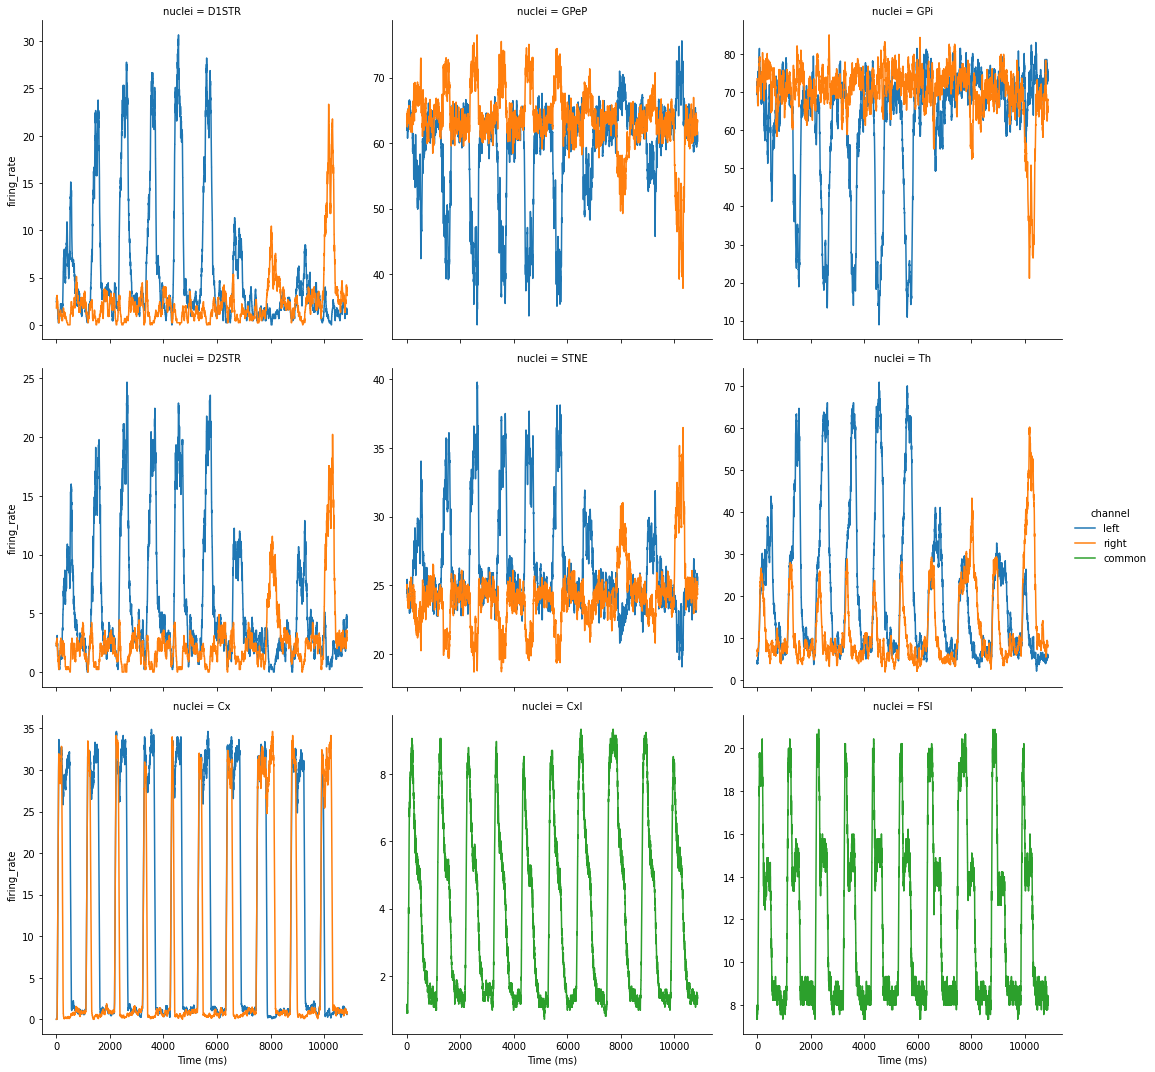

In [20]:
# Plot the firing rates extracted, figure handles are returned in fig_handles

FR_fig_handles = plt_func.plot_fr(firing_rates)


{'left': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'right': (1.0, 0.4980392156862745, 0.054901960784313725)}


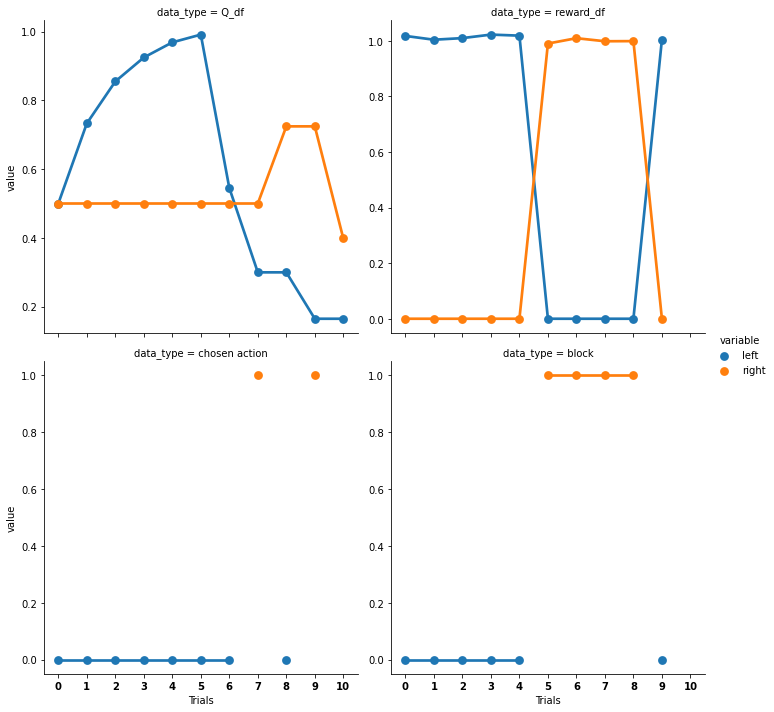

In [21]:
reward_fig_handles = plt_func.plot_reward_Q_df(reward_q_df)

In [22]:
# inp = np.array(results[0]['agent'].inp)

# fig,ax = pl.subplots(1,2,figsize=(12,9))
# ax[0].plot(inp[:,0],label='Ctx-left-input')
# ax[0].plot(inp[:,1],label='Ctx-right-input')
# ax[0].legend()
# ax[1].plot(popfreqs[i].iloc[:,10],label="Ctx-left-activity",color='r')
# ax[1].plot(popfreqs[i].iloc[:,11],label="Ctx-right-activity",color='g')
# ax[1].plot(popfreqs[i].iloc[:,15],label="Ctx-inhibition",color='c')
# ax[1].legend()
# fig.savefig(figure_dir+"Input_vs_activity_lip"+str(seed)+".png")

In [23]:
# for i in np.arange(len(results)):
#     fig,ax = plt.subplots(2,3,figsize=(24,16))
#     print(ax)
#     stim_on = datatables[i]["stimulusstarttime"]
#     decision_time = datatables[i]["decisiontime"]
#     weights = np.array(results[i]['agent'].hist_w)
#     Wts = pd.DataFrame.from_records(np.array(results[i]['agent'].hist_w).reshape(len(weights),4),columns=nuc_list)
#     ax[0][0].plot(popfreqs[i].iloc[:,0],label="GPi-left")
#     ax[0][0].plot(popfreqs[i].iloc[:,1],label="GPi-right")

#     ax[0][1].plot(popfreqs[i].iloc[:,12],label="Th-left")
#     ax[0][1].plot(popfreqs[i].iloc[:,13],label="Th-right")
    
#     ax[0][2].plot(popfreqs[i].iloc[:,10],label="Ctx-left")
#     ax[0][2].plot(popfreqs[i].iloc[:,11],label="Ctx-right")

    
#     ax[1][0].plot(popfreqs[i].iloc[:,6],label="D1-left")
#     ax[1][0].plot(popfreqs[i].iloc[:,7],label="D1-right")
#     for k in nuc_list:
#         ax[1][1].plot(Wts[k],label=k)

#     for a in np.hstack(ax):
#         ylims = a.get_ylim()
#         for s,d in zip(stim_on,decision_time):
#             a.vlines(x=s,ymin=ylims[0],ymax=ylims[1],color='k',lw=1.0,ls="solid")
#             a.vlines(x=d,ymin=ylims[0],ymax=ylims[1],color='k',lw=1.0,ls="dashed")
#             a.set_ylim(ylims[0],ylims[1])
#         a.set_xlim(0,3000)
#         a.legend()
#     fig.subplots_adjust(left=0.06,bottom=0.06,right=0.96,top=0.96)
#     fig.savefig(figure_dir+"Zoomed_in_activity_"+str(seed)+"_"+str(i)+".png")